# TP2 - Linear regression

Author: William Liaw

## File naming convention

In [1]:
# Change here using YOUR own first and last names
fn1 = "william"
ln1 = "liaw"
filename = (
    "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
)

print(filename)

sd-tsia204_lab2_liaw_william.ipynb


## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import Normalize
from scipy.stats import t
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Question 1

### Importing data

In [3]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
data_california_housing = X.join(y)
X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)

### Preliminary data analysis

In [4]:
data_california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
data_california_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
data_california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

### (a)

#### Authorial's version

In [8]:
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

theta_hat_authorial = (
    np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train
)
y_pred_authorial = X_test_bias @ theta_hat_authorial

In [9]:
def mean_squared_error_authorial(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def r2_authorial(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - y_true.mean()) ** 2)

In [10]:
mean_squared_error_authorial = mean_squared_error_authorial(y_test, y_pred_authorial)
r2_authorial = r2_authorial(y_test, y_pred_authorial)

In [11]:
print(f"Authorial\n\tMSE: {mean_squared_error_authorial}\n\tR2: {r2_authorial}")

Authorial
	MSE: 0.5404128061711873
	R2: 0.5911695436408375


#### `sklearn`'s version

In [12]:
model_sklearn_linear_regression = LinearRegression().fit(X_train, y_train)

In [13]:
y_pred_sklearn_linear_regression = model_sklearn_linear_regression.predict(X_test)

In [14]:
mean_squared_error_sklearn_linear_regression = mean_squared_error(
    y_test, y_pred_sklearn_linear_regression
)

r2_sklearn_linear_regression = model_sklearn_linear_regression.score(X_test, y_test)

In [15]:
print(
    f"Sklearn\n\tMSE: {mean_squared_error_sklearn_linear_regression}\n\tR2: {r2_sklearn_linear_regression}"
)

Sklearn
	MSE: 0.540412806170911
	R2: 0.5911695436410465


In [16]:
theta_hat_sklearn_linear_regression = np.hstack(
    (
        model_sklearn_linear_regression.intercept_.reshape(-1, 1),
        model_sklearn_linear_regression.coef_,
    )
)

#### Comparison of the two versions

In [17]:
theta_hat_dataframe = pd.DataFrame(
    {
        "authorial_linear_regression": theta_hat_authorial.reshape(
            -1,
        ),
        "sklearn_linear_regression": theta_hat_sklearn_linear_regression.reshape(
            -1,
        ),
    },
    index=np.char.add("theta", np.arange(9).astype(str)),
)

In [18]:
theta_hat_dataframe

,authorial_linear_regression,sklearn_linear_regression
theta0,-36.609594,-36.609594
theta1,0.439091,0.439091
theta2,0.009599,0.009599
theta3,-0.103311,-0.103311
theta4,0.616730,0.616730
theta5,-0.000008,-0.000008
theta6,-0.004488,-0.004488
theta7,-0.417353,-0.417353
theta8,-0.430614,-0.430614


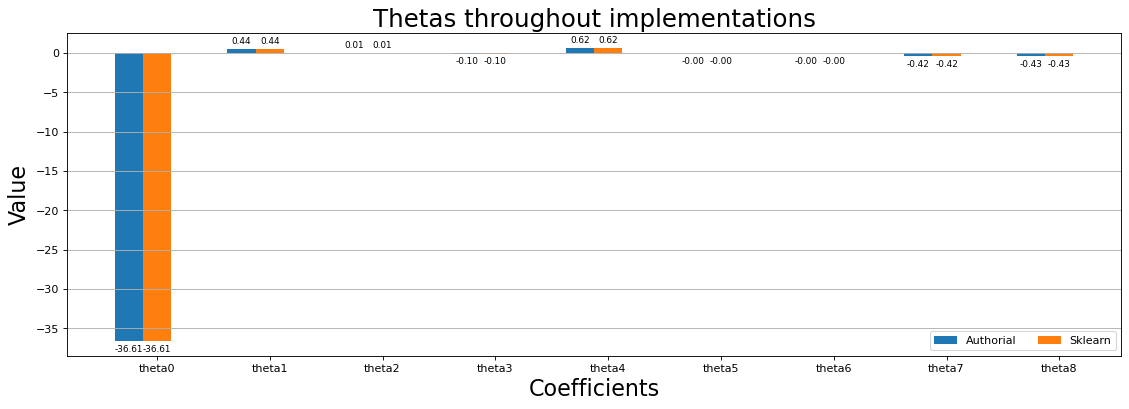

In [19]:
x = np.arange(theta_hat_dataframe.shape[0])
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout="constrained", figsize=(14, 5), dpi=80)

for implementation, measurement in theta_hat_dataframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=implementation)
    ax.bar_label(rects, padding=3, fmt="%.2f", fontsize=8)
    multiplier += 1

ax.set_xlabel("Coefficients", fontsize=20)
ax.set_ylabel("Value", fontsize=20)
ax.set_title("Thetas throughout implementations", fontsize=22)

ax.set_xticks(x + width, theta_hat_dataframe.index)
ax.legend(["Authorial", "Sklearn"], ncols=theta_hat_dataframe.shape[1])

ax.grid(axis="y")
plt.show()

The coefficients identified by the author appear to be identical to those obtained through the `scikit-learn` implementation.

### (b)

In [20]:
degrees_of_freedom = X_train.shape[0] - X_train.shape[1] - 1
alpha = 0.01

t_statistic = t.ppf(1 - alpha / 2, df=degrees_of_freedom)

#### Authorial version

In [21]:
sigma2_hat_authorial = (
    np.sum(
        (
            y_train
            - X_train_bias @ theta_hat_dataframe.loc[:, ["authorial_linear_regression"]]
        )
        ** 2,
        axis=0,
    )
    / degrees_of_freedom
).item()


margin_of_error_authorial = t_statistic * np.sqrt(
    sigma2_hat_authorial * np.diag(np.linalg.inv(X_train_bias.T @ X_train_bias))
)


confidence_interval_authorial = np.vstack(
    (
        theta_hat_dataframe["authorial_linear_regression"] - margin_of_error_authorial,
        theta_hat_dataframe["authorial_linear_regression"] + margin_of_error_authorial,
    )
)

In [22]:
pd.DataFrame(
    confidence_interval_authorial.T,
    columns=["lower_bound", "upper_bound"],
    index=np.char.add("theta", np.arange(9).astype(str)),
)

,lower_bound,upper_bound
theta0,-38.566040,-34.653147
theta1,0.426611,0.451571
theta2,0.008277,0.010920
theta3,-0.120727,-0.085895
theta4,0.534397,0.699063
theta5,-0.000022,0.000006
theta6,-0.006742,-0.002234
theta7,-0.438729,-0.395977
theta8,-0.452995,-0.408234


#### `sklearn`'s version

In [23]:
sigma2_hat_sklearn_linear_regression = (
    np.sum(
        (
            y_train
            - X_train_bias @ theta_hat_dataframe.loc[:, ["sklearn_linear_regression"]]
        )
        ** 2,
        axis=0,
    )
    / degrees_of_freedom
).item()

margin_of_error_sklearn_linear_regression = t_statistic * np.sqrt(
    sigma2_hat_sklearn_linear_regression
    * np.diag(np.linalg.inv(X_train_bias.T @ X_train_bias))
)

confidence_interval_sklearn_linear_regression = np.vstack(
    (
        theta_hat_dataframe["sklearn_linear_regression"]
        - margin_of_error_sklearn_linear_regression,
        theta_hat_dataframe["sklearn_linear_regression"]
        + margin_of_error_sklearn_linear_regression,
    )
)

In [24]:
pd.DataFrame(
    confidence_interval_sklearn_linear_regression.T,
    columns=["lower_bound", "upper_bound"],
    index=np.char.add("theta", np.arange(9).astype(str)),
)

,lower_bound,upper_bound
theta0,-38.566040,-34.653147
theta1,0.426611,0.451571
theta2,0.008277,0.010920
theta3,-0.120727,-0.085895
theta4,0.534397,0.699063
theta5,-0.000022,0.000006
theta6,-0.006742,-0.002234
theta7,-0.438729,-0.395977
theta8,-0.452995,-0.408234


Once again, `scikit-learn`'s implementation appears to precisely align with the confidence intervals established by the author.

## Question 2

### Importing data

In [25]:
data = pd.read_csv("./data.csv", header=None)
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, [-1]])

### Preliminary data analysis

In [26]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [27]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,...,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,1.004727e-17,-8.037814e-18,1.607563e-17,0.000000,-4.018907e-18,-8.037814e-18,2.612289e-17,4.018907e-18,0.000000,-1.205672e-17,...,-1.205672e-17,0.000000,1.808508e-17,-4.018907e-18,3.014180e-18,1.281027e-17,8.037814e-18,1.205672e-17,1.406617e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,...,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007,-2.695861e+00,...,-3.059475e+00,-3.206539,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-0.671547,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-0.666675,-6.930021e-01,...,-6.885118e-01,-0.579332,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,0.000066,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,0.000605,3.602406e-02,...,-2.994795e-02,0.025405,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,0.688197,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,0.629808,6.629150e-01,...,6.672697e-01,0.667664,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090,3.032505e+00,...,2.677458e+00,2.806877,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Columns: 211 entries, 0 to 210
dtypes: float64(211)
memory usage: 728.7 KB


### (a)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [30]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

Given the absence of further details concerning the data and in alignment with the guidance offered by the course instructors, we opted to normalize not only the variable data ($X$) but also the target data ($y$).

### (b)

In [31]:
model_sklearn_linear_regression = LinearRegression(fit_intercept=False).fit(X_train, y_train)

In [32]:
y_pred_sklearn_linear_regression = model_sklearn_linear_regression.predict(X_test)

In [33]:
mean_squared_error_sklearn_linear_regression = mean_squared_error(
    y_test, y_pred_sklearn_linear_regression
)

r2_sklearn_linear_regression = model_sklearn_linear_regression.score(X_test, y_test)

Here, we chose to use `scikit-learn`'s implementation for the regular OLS.

In [34]:
print(
    f"Sklearn\n\tMSE: {mean_squared_error_sklearn_linear_regression}\n\tR2: {r2_sklearn_linear_regression}"
)

Sklearn
	MSE: 0.6217179947173102
	R2: 0.21684659135461515


## Question 3

### (a)

One approach to construct the desired function is outlined as follows:

```python
def test_no_effect(X, y):
    """
    Fit p linear regression models, each using only one feature to predict y,
    and conduct a test of no effect for each model.

    Parameters:
    - X: Independent variables (numpy array or pandas DataFrame) of shape (n, p).
    - y: Dependent variable (numpy array or pandas Series) of shape (n, 1).

    Returns:
    - best_feature_index: Index of the feature with the smallest p-value.
    - best_coefficient: Coefficient corresponding to the best feature.
    - p_values: P-values associated with the test for the all features.
    """

    X = np.array(X)
    y = np.array(y)

    degrees_of_freedom = X.shape[0] - 2
    best_p_value = 1
    best_feature_index = None
    best_coefficient = None
    p_values = []

    for j, X_j in enumerate(X.T):
        # Fit a simple linear regression model using only the j-th feature
        inverse_sum_of_squares = (X_j.T @ X_j) ** -1
        theta_hat = inverse_sum_of_squares * X_j.T @ y

        # Calculate the standard error of the coefficient
        sigma2_hat = np.sum((y - (X_j * theta_hat).reshape(-1, 1)) ** 2) / degrees_of_freedom

        # Calculate t-statistic and p-value
        t_statistic = theta_hat / np.sqrt(sigma2_hat * inverse_sum_of_squares)
        p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=degrees_of_freedom))
        p_values.append(p_value)

        # Update the best feature if its p-value is lower
        if p_value < best_p_value:
            print(j, (y - X_j * theta_hat).shape)
            best_p_value = p_value[0]
            best_feature_index = j
            best_coefficient = theta_hat[0]

    return best_feature_index, best_coefficient, p_values
```

Nevertheless, the preceding function exhibits a slower performance, despite its commendable readability. The subsequent cell introduces a more efficient alternative that leverages the capabilities of `numpy` functions. While it may pose a greater initial challenge for comprehension, its enhanced speed makes it a worthwhile improvement.

Obs.: yet another way to implement this function would be with `scikit-learn`'s linear regression model `LinearRegression(fit_intercept=False)`, as the data is expected to be centered.

```python
def test_no_effect(X, y):
    """
    Fit p linear regression models, each using only one feature to predict y,
    and conduct a test of no effect for each model.

    Parameters:
    - X: Independent variables (numpy array or pandas DataFrame) of shape (n, p).
    - y: Dependent variable (numpy array or pandas Series) of shape (n, 1).

    Returns:
    - best_feature_index: Index of the feature with the smallest p-value.
    - best_coefficient: Coefficient corresponding to the best feature.
    - p_values: P-values associated with the test for the all features.
    """

    X = np.array(X)
    y = np.array(y)

    degrees_of_freedom = X.shape[0] - 2
    best_p_value = 1
    best_feature_index = None
    best_coefficient = None
    p_values = []

    for j, X_j in enumerate(X.T):
        # Fit a simple linear regression model using only the j-th feature
        inverse_sum_of_squares = (X_j.T @ X_j) ** -1

        model = LinearRegression(fit_intercept=False).fit(X_j.reshape(-1, 1), y)

        # Calculate the standard error of the coefficient
        sigma2_hat = np.sum((y - model.predict(X_j.reshape(-1, 1))) ** 2) / degrees_of_freedom

        # Calculate t-statistic and p-value
        t_statistic = model.coef_[0] / np.sqrt(sigma2_hat * inverse_sum_of_squares)
        p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=degrees_of_freedom))
        p_values.append(p_value)
        
        # Update the best feature if its p-value is lower
        if p_value < best_p_value:
            best_p_value = p_value[0]
            best_feature_index = j
            best_coefficient = model.coef_[0, 0]

    return best_feature_index, best_coefficient, p_values
```

In [35]:
def test_no_effect(X, y):
    """
    Fit p linear regression models, each using only one feature to predict y,
    and conduct a test of no effect for each model.

    Parameters:
    - X: Independent variables (numpy array or pandas DataFrame) of shape (n, p).
    - y: Dependent variable (numpy array or pandas Series) of shape (n, 1).

    Returns:
    - best_feature_index: Index of the feature with the smallest p-value.
    - best_coefficient: Coefficient corresponding to the best feature.
    - p_value: P-values associated with the test for the all features.
    """

    X = np.array(X)
    y = np.array(y)

    degrees_of_freedom = X.shape[0] - 2

    # Fit a simple linear regression model using only the j-th feature
    inverse_sum_of_squares = (np.sum(X**2, axis=0) ** -1).reshape(-1, 1)
    theta_hat = inverse_sum_of_squares * X.T @ y

    # Calculate the standard error of the coefficient
    sigma2_hat = (
        np.sum((np.tile(y, (1, X.shape[1])) - X * theta_hat.T) ** 2, axis=0)
        / degrees_of_freedom
    ).reshape(-1, 1)

    # Calculate t-statistic and p-value
    t_statistic = theta_hat / np.sqrt(sigma2_hat * inverse_sum_of_squares)
    p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

    best_feature_index = np.argmin(p_value)
    best_coefficient = theta_hat[best_feature_index, 0]

    return best_feature_index, best_coefficient, p_value

In the context of linear regression, the null hypothesis for a particular feature is that its corresponding coefficient is zero, meaning that the feature has no effect on the target variable. The alternative hypothesis is that the coefficient is not zero, indicating that the feature does have an effect.

The p-value associated with the coefficient of each feature represents the probability of observing the given coefficient (or more extreme) if the null hypothesis is true. In other words, a small p-value suggests that it is unlikely to observe the obtained coefficient if the feature has no effect on the target variable.

Therefore, in this function, we iterate over each feature, fit a linear regression model using only that feature, and conduct a test of no effect. The feature with the smallest p-value is considered the most statistically significant, indicating that its inclusion in the model has a significant effect on predicting the target variable.

We can test the function as follows:

In [36]:
best_feature_index, best_coefficient, p_value = test_no_effect(X_train, y_train)

print(
    f"Best feature: {best_feature_index},\nBest coefficient: {best_coefficient:.5f},\nBest p-value: {np.min(p_value):.5g}"
)

Best feature: 34,
Best coefficient: 0.44108,
Best p-value: 0


It's crucial to recognize that the p-value, given the current constraints, can never precisely reach zero. Due to the finite nature of computational floating-point precision, the returned value might be extremely close to zero but not exactly zero. The inherent limitations in numerical representation mean that the calculated p-value is an approximation, and achieving absolute zero is practically unattainable within the confines of finite computational precision. It underscores the importance of interpreting extremely small p-values with an understanding that they signify an exceedingly low probability but not an absolute certainty of the observed results.

### (b) and (c)

In [37]:
def forward_feature_selection(X, y, max_iterations=5, threshold=0.05, draw_plot=True):
    """
    Perform forward feature selection iteratively with a halting condition.

    Parameters:
    - X: Independent variables (numpy array or pandas DataFrame).
    - y: Dependent variable (numpy array or pandas Series).
    - max_iterations: Maximum number of iterations (default is 5).

    Returns:
    - selected_features: List of indices of the selected features.
    - coefficients: Coefficients corresponding to the selected features.
    - p_values: P-values associated with the tests for each selected feature.
    """

    X = np.array(X)
    y = np.array(y)

    selected_features = []
    selected_features_index = []
    discarded_features_index = list(range(X.shape[1]))
    coefficients = []
    p_values = []

    # Iterate until all features are selected or max_iterations reached
    for iteration in range(max_iterations):
        # Initialize variables for the current iteration
        best_feature_index, best_coefficient, p_value = test_no_effect(X, y)

        # Check halting condition
        if np.min(p_value) > threshold:
            print(f"Halting condition met at iteration {iteration + 1}")
            break

        # Include the best feature in the set S
        selected_features.append(X[:, best_feature_index])
        coefficients.append(best_coefficient)
        selected_features_index.append(discarded_features_index.pop(best_feature_index))
        if iteration < 5:
            p_values.append(p_value)

        # Subtract from y the residuals of the model fit with the selected feature
        y -= (X[:, best_feature_index] * best_coefficient).reshape(-1, 1)

        # Remove the selected feature from X
        X = np.delete(X, best_feature_index, axis=1)


    selected_features = np.array(selected_features)

    # Plot p-values for the first 5 iterations
    # for all coefficients that were in X at the begining of the iteration
    if draw_plot:
        plt.figure(figsize=(16, 9), dpi=80)

        for index, p_value in enumerate(p_values):
            plt.plot(
                range(len(p_value)),
                p_value.reshape(-1),
                marker="o",
                label=f"Iteration {index + 1}",
                alpha=0.5,
            )

        plt.axhline(y=threshold, linestyle="--", c="r")

        plt.xlabel("Features", fontsize=20)
        plt.ylabel("P-value", fontsize=20)
        plt.title("P-values for Coefficients in the First Iterations", fontsize=22)

        plt.xticks(fontsize=12, alpha=0.7)
        plt.yticks(fontsize=12, alpha=0.7)

        plt.gca().spines[["top", "right"]].set_alpha(0.0)
        plt.gca().spines[["bottom", "left"]].set_alpha(0.3)

        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()

    return selected_features, selected_features_index, coefficients, p_values

In the feature selection process, subtracting the predictions of the model fitted with the selected feature at each iteration serves key purposes. Firstly, it maintains the independence of residuals, a crucial assumption in linear regression, by ensuring that the unexplained variation in the target variable remains approximately independent. This is essential for reliable statistical inferences and parameter estimation.

Secondly, the subtraction of predictions facilitates the capture of incremental information. At each step, the model aims to incorporate unique insights contributed by the selected feature that were not accounted for by previously chosen features. This isolates the influence of prior selections, allowing subsequent iterations to focus on novel relationships and improving the model's adaptability.

Moreover, the subtractive approach addresses issues related to collinearity. Multicollinearity challenges arise when predictor variables are highly correlated, impacting interpretability. By removing the explained variance associated with selected features, the approach reduces redundancy and helps discern the individual contributions of each feature, promoting stability and interpretability in the model.

In summary, subtracting predictions in stepwise feature selection ensures the model maintains independence, captures incremental information, and addresses collinearity concerns. This strategy contributes to the development of a robust and interpretable predictive model in linear regression analysis.

We can test the function as follows:

Halting condition met at iteration 14


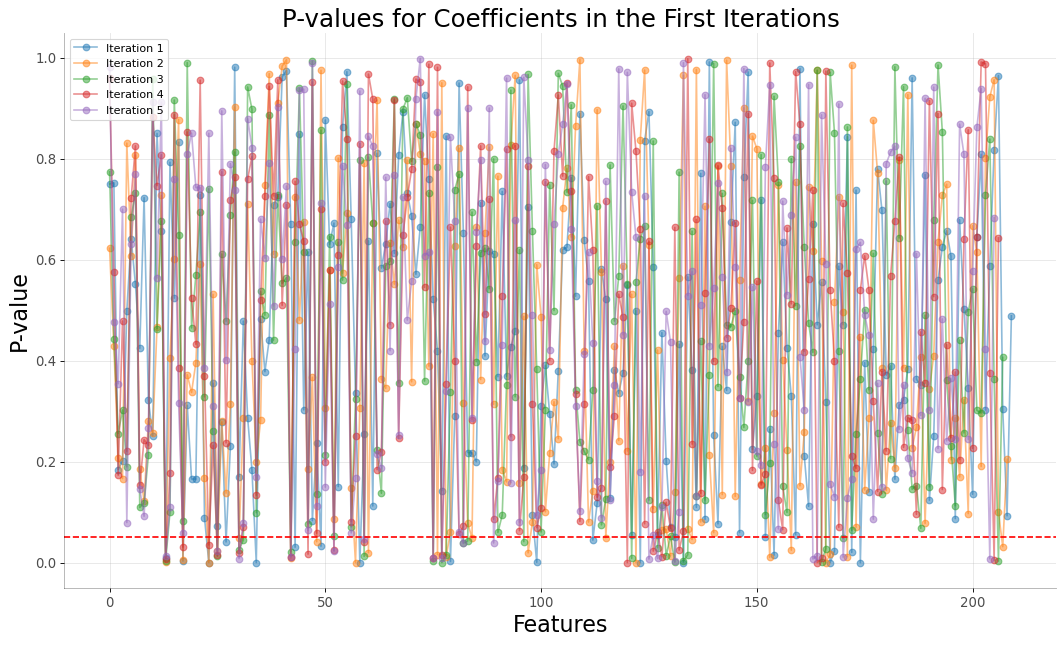

In [38]:
selected_features, features_index, coefficients, p_values = forward_feature_selection(
    X_train, y_train, max_iterations=30
)

In [39]:
features_index

[34, 58, 79, 123, 135, 167, 30, 77, 168, 174, 129, 183, 13]

In [40]:
model_forward_feature_selection = LinearRegression(fit_intercept=False).fit(
    X_train[:, features_index], y_train
)

## Question 4

As requested, we can design a versatile function that can be parameterized to cater to specific scenarios involving regularization models such as Ridge, Lasso, and Elastic Net.

In [41]:
def plot_regularization_model(
    regularization_model, alphas, X_train, y_train, X_test, y_test
):
    coefficients = []
    r2_scores_train = []
    r2_scores_test = []
    models = []
    for alpha in alphas:
        if regularization_model == "Ridge":
            model = Ridge(alpha=alpha, fit_intercept=False).fit(X_train, y_train)
        if regularization_model == "Lasso":
            model = Lasso(alpha=alpha, fit_intercept=False).fit(X_train, y_train)
        if regularization_model == "ElasticNet":
            model = ElasticNet(alpha=alpha, fit_intercept=False).fit(X_train, y_train)
        coefficients.append(model.coef_)
        r2_scores_train.append(model.score(X_train, y_train))
        r2_scores_test.append(model.score(X_test, y_test))
        models.append(model)

    coefficients = np.array(coefficients).reshape(len(alphas), X_train.shape[1])

    colors = plt.get_cmap("viridis", X_train.shape[1])
    color_vector = colors(np.linspace(0, 1, X_train.shape[1]))

    plt.figure(figsize=(16, 9), dpi=80)

    for color, column in zip(color_vector, coefficients.T):
        plt.plot(alphas, column, marker="o", c=color, alpha=0.5)

    plt.xlabel("Penalty coefficient", fontsize=20)
    plt.ylabel("Coefficient value", fontsize=20)
    plt.title(f"Evolution of coefficients with {regularization_model}", fontsize=22)

    plt.yticks(fontsize=12, alpha=0.7)
    plt.xticks(fontsize=12, alpha=0.7)

    plt.gca().spines[["top", "right"]].set_alpha(0.0)
    plt.gca().spines[["bottom", "left"]].set_alpha(0.3)

    plt.xscale("log")
    plt.colorbar(
        ax=plt.gca(),
        mappable=plt.cm.ScalarMappable(
            cmap=colors, norm=Normalize(vmin=0, vmax=X.shape[1] - 1)
        ),
        label="Coefficient index",
    )
    plt.grid()
    plt.show()

    plt.figure(figsize=(16, 9), dpi=80)

    plt.plot(alphas, r2_scores_train, marker="o", label="Train")
    plt.plot(alphas, r2_scores_test, marker="o", label="Test")

    plt.xlabel("Penalty coefficient", fontsize=20)
    plt.ylabel("R2", fontsize=20)
    plt.title(f"Evolution of R2 with with {regularization_model}", fontsize=22)

    plt.yticks(fontsize=12, alpha=0.7)
    plt.xticks(fontsize=12, alpha=0.7)

    plt.gca().spines[["top", "right"]].set_alpha(0.0)
    plt.gca().spines[["bottom", "left"]].set_alpha(0.3)

    plt.legend()
    plt.xscale("log")
    plt.grid()
    plt.show()

    return models[np.argmax(r2_scores_test)]

### (a) and (b)

In [42]:
alphas = np.logspace(start=-1, stop=6, num=30)

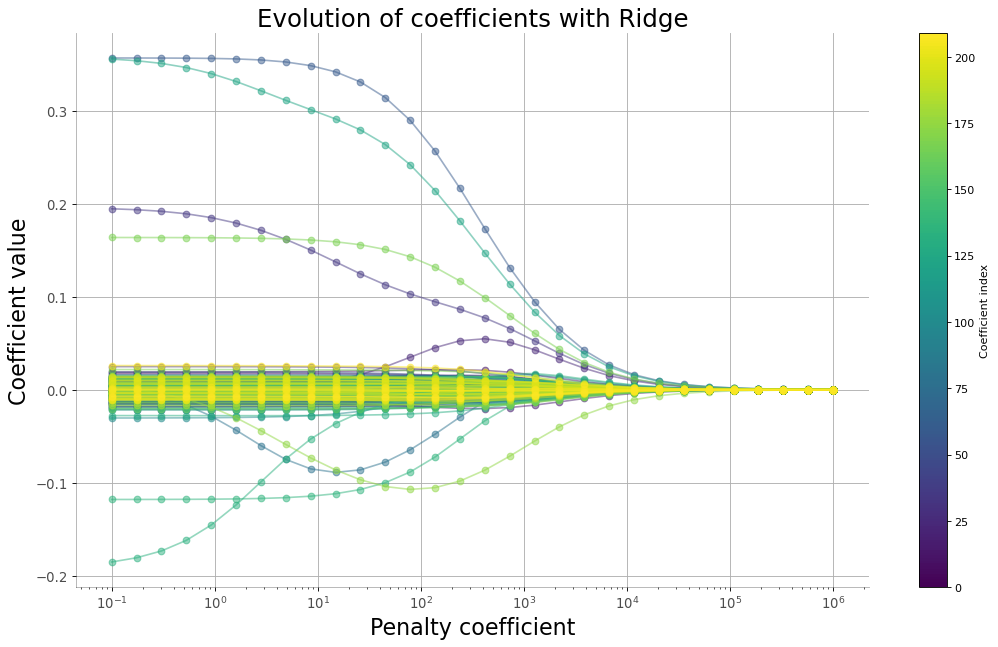

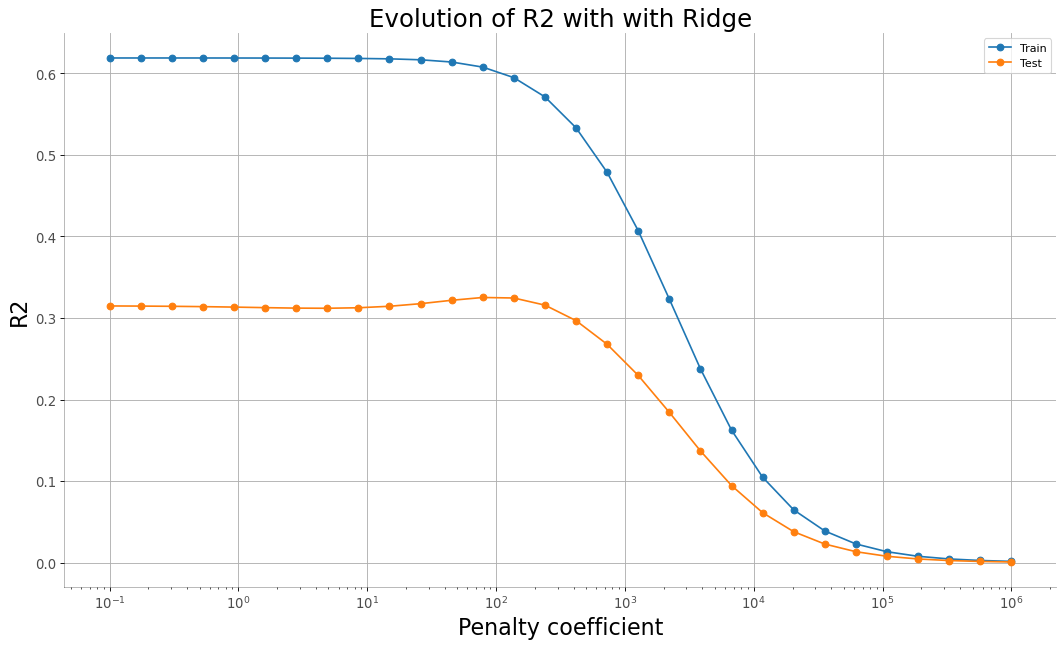

In [43]:
model_sklearn_ridge = plot_regularization_model(
    "Ridge", alphas, X_train, y_train, X_test, y_test
)

## Question 5

In [44]:
alphas = np.logspace(start=-3, stop=2, num=30)

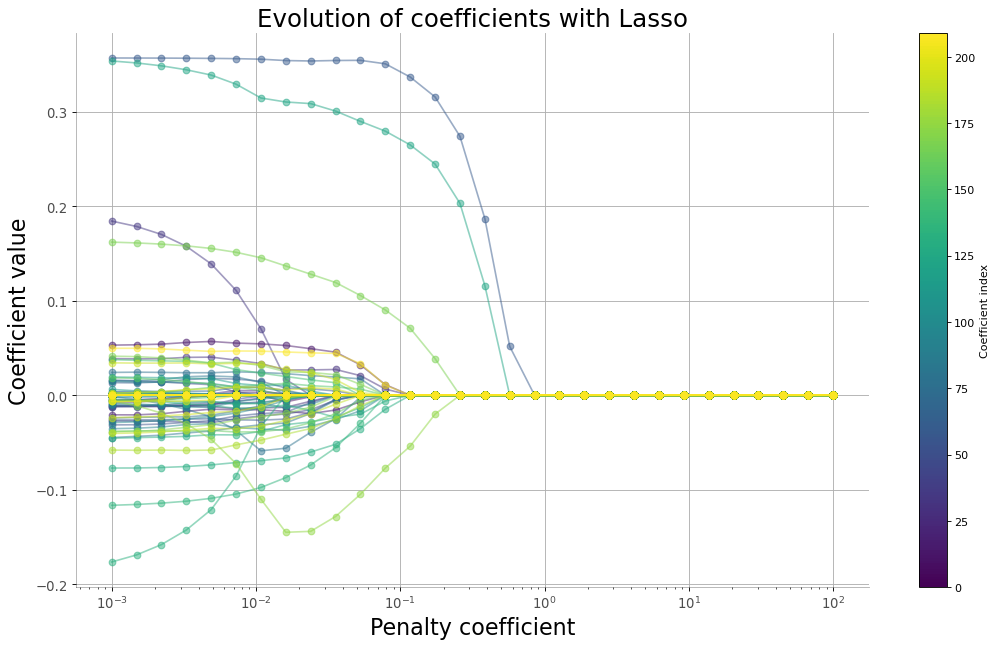

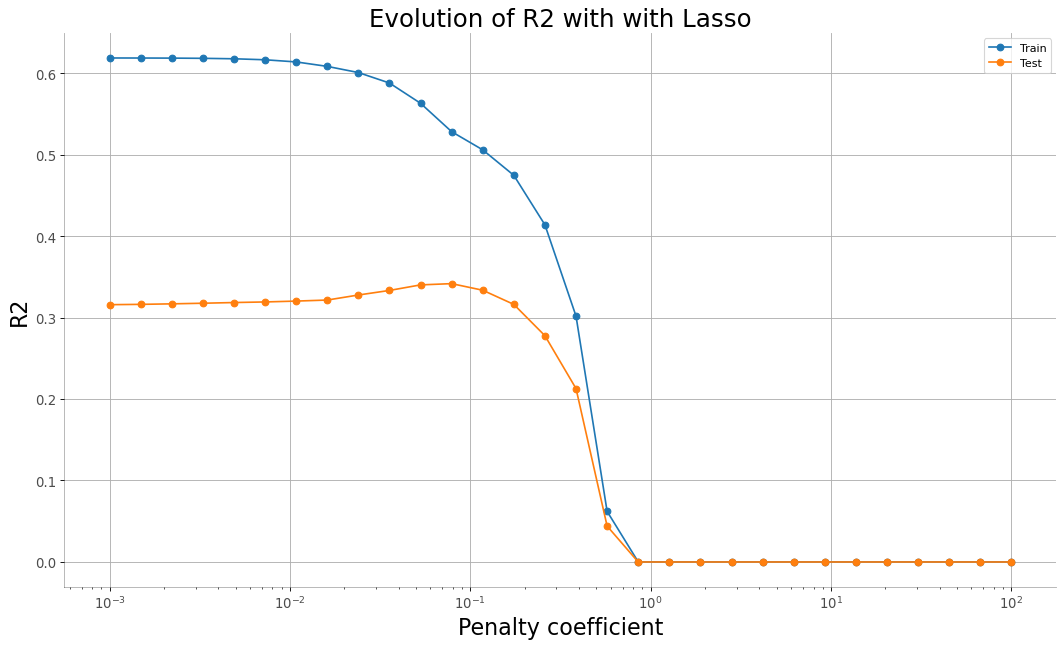

In [45]:
model_sklearn_lasso = plot_regularization_model(
    "Lasso", alphas, X_train, y_train, X_test, y_test
)

## Question 6

In [46]:
alphas = np.logspace(start=-3, stop=2, num=30)

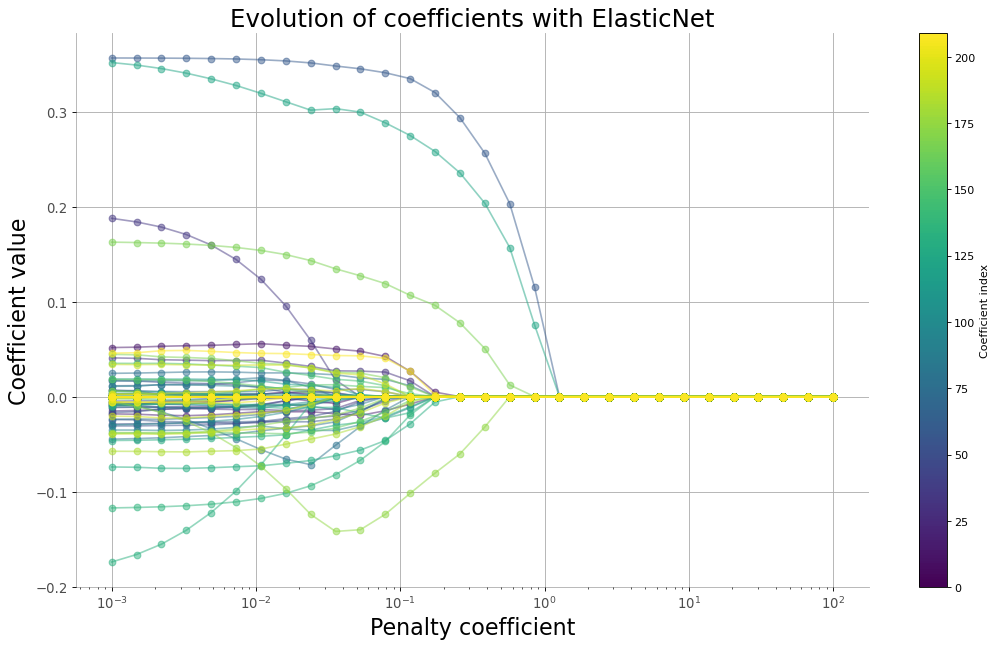

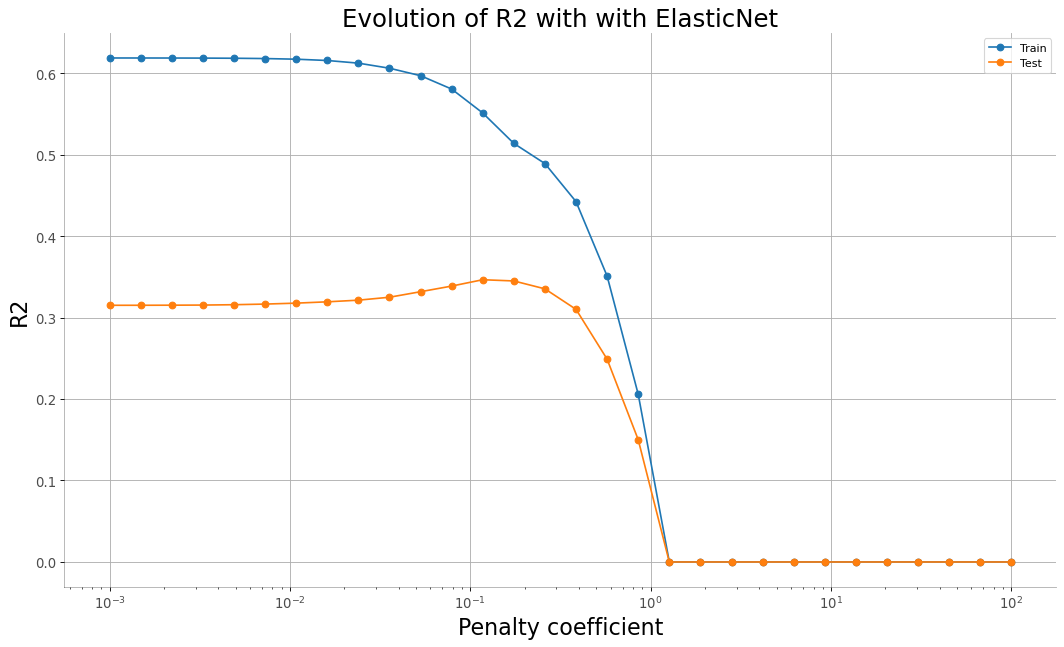

In [47]:
model_sklearn_elastic_net = plot_regularization_model(
    "ElasticNet", alphas, X_train, y_train, X_test, y_test
)

## Question 7

### (a)

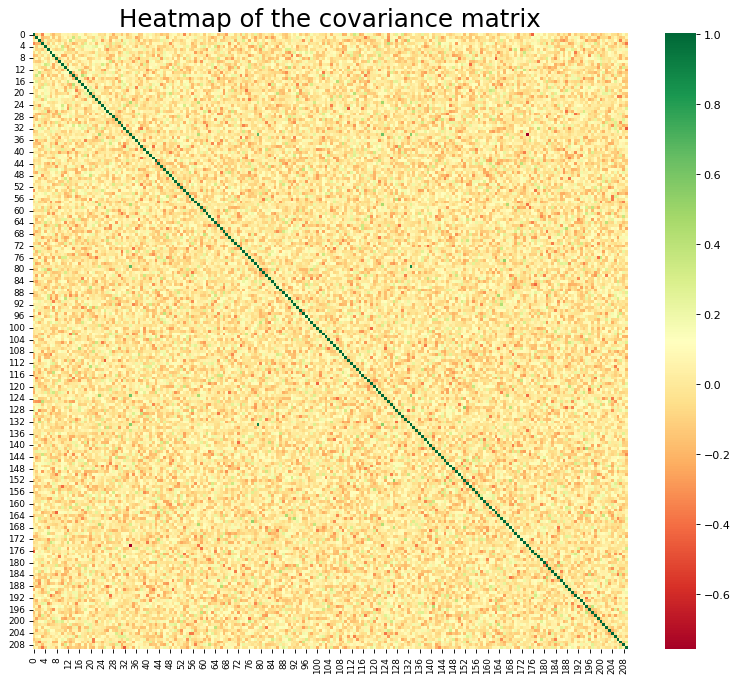

In [48]:
cov_matrix = np.cov(X_train.T)

plt.figure(figsize=(12, 10), dpi=80)

sns.heatmap(
    cov_matrix,
    cmap="RdYlGn",
)

plt.title("Heatmap of the covariance matrix", fontsize=22)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### (b)

In [49]:
U, s, V = np.linalg.svd(cov_matrix)

In [50]:
pca_components = V
Z_train = X_train @ pca_components
Z_test = X_test @ pca_components

In [51]:
model_pcr_all = LinearRegression(fit_intercept=False).fit(Z_train, y_train)

### (c)

In [52]:
explained_variance_ratio = np.cumsum(s) / np.sum(s)

In [53]:
num_components_90 = np.argmax(explained_variance_ratio >= 0.9) + 1
print(f"Number of components needed for 90% variance: {num_components_90}")

Number of components needed for 90% variance: 45


In [54]:
model_pcr_k45 = LinearRegression(fit_intercept=False).fit(
    Z_train[:, :num_components_90], y_train
)

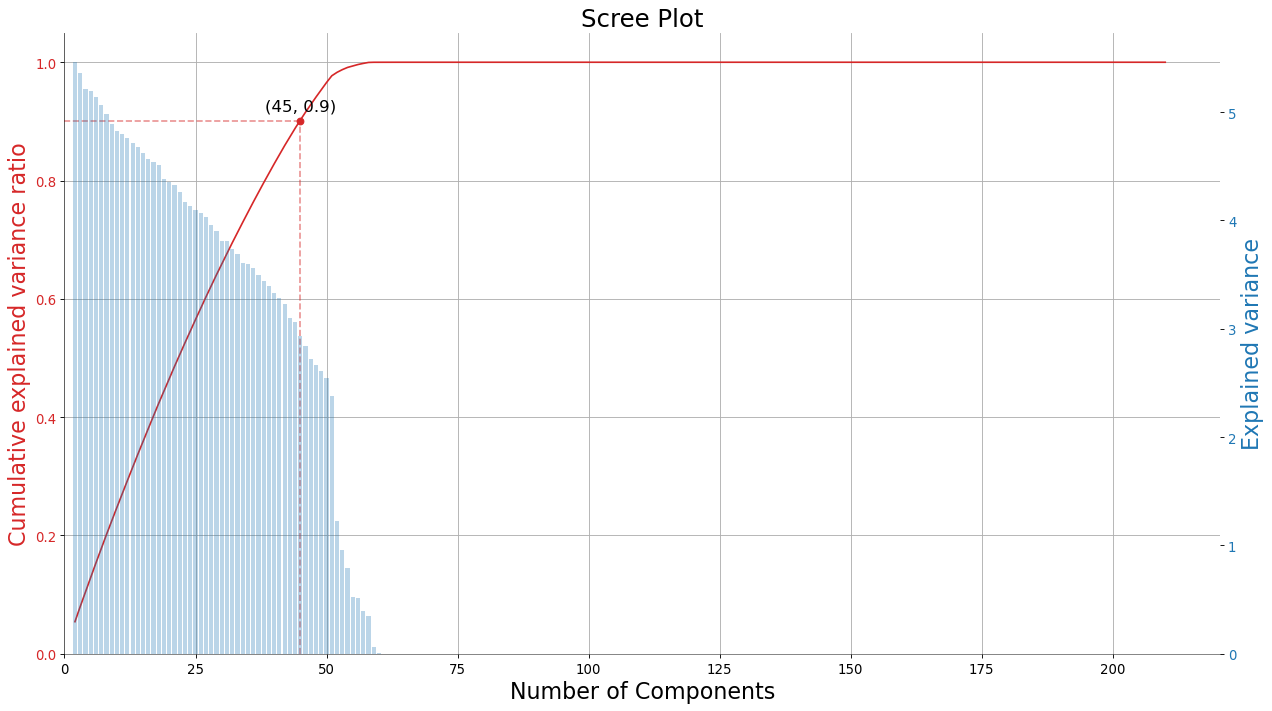

In [55]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 9), dpi=80)

ax1.plot(
    range(2, len(explained_variance_ratio) + 1),
    explained_variance_ratio[1:],
    color="tab:red",
)

ax1.text(
    num_components_90,
    0.9 * 1.02,
    f"({num_components_90}, {0.9})",
    fontsize=15,
    horizontalalignment="center",
)
ax1.scatter(num_components_90, 0.9, c="tab:red")
ax1.hlines(
    y=0.9, xmin=0, xmax=num_components_90, linestyle="--", alpha=0.5, colors="tab:red"
)
ax1.vlines(
    x=num_components_90, ymin=0, ymax=0.9, linestyle="--", alpha=0.5, colors="tab:red"
)

ax1.set_ylim(0, 1.05)
ax1.set_xlim(0, X.shape[1] * 1.05)

ax1.set_xlabel("Number of Components", fontsize=20)
ax1.tick_params(axis="x", rotation=0, labelsize=12)
ax1.set_ylabel("Cumulative explained variance ratio", color="tab:red", fontsize=20)
ax1.tick_params(axis="y", rotation=0, labelcolor="tab:red", labelsize=12)
ax1.spines[["top", "right"]].set_alpha(0.0)
ax1.spines[["bottom", "left"]].set_alpha(0.3)
ax1.grid()

ax2 = ax1.twinx()

ax2.bar(range(2, len(explained_variance_ratio) + 1), s[1:], alpha=0.3, color="tab:blue")

ax2.set_ylabel("Explained variance", color="tab:blue", fontsize=20)
ax2.tick_params(axis="y", labelcolor="tab:blue", labelsize=12)
ax2.set_title("Scree Plot", fontsize=22)
ax2.spines[["top", "right"]].set_alpha(0.0)
ax2.spines[["bottom", "left"]].set_alpha(0.3)

fig.tight_layout()
plt.show()

### (d)

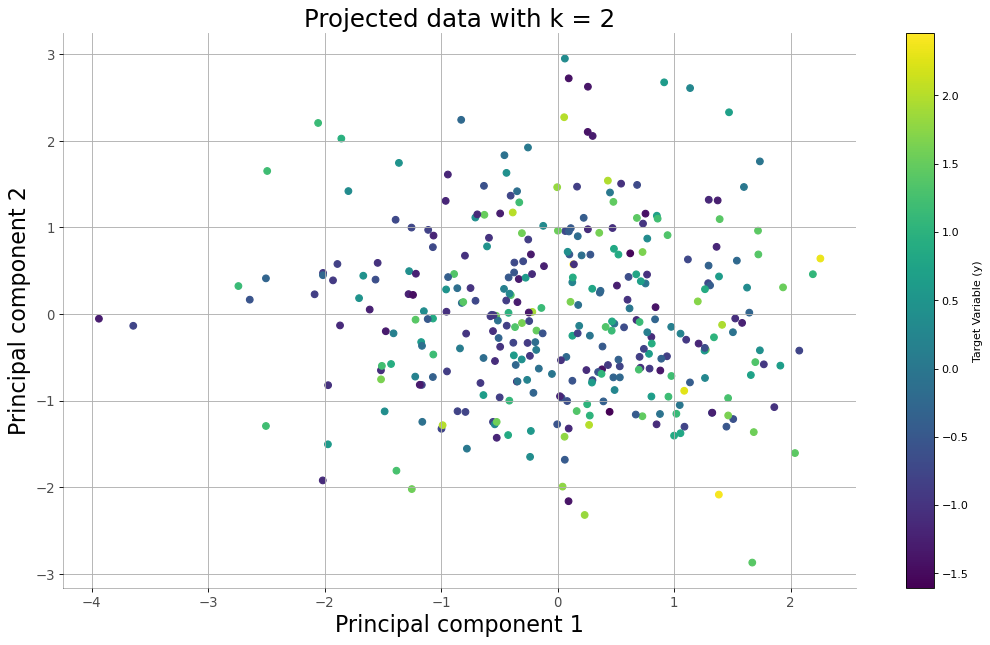

In [56]:
plt.figure(figsize=(16, 9), dpi=80)

plt.scatter(Z_train[:, 0], Z_train[:, 1], c=y_train, cmap="viridis")

plt.xlabel("Principal component 1", fontsize=20)
plt.ylabel("Principal component 2", fontsize=20)
plt.title("Projected data with k = 2", fontsize=22)

plt.yticks(fontsize=12, alpha=0.7)
plt.xticks(fontsize=12, alpha=0.7)

plt.gca().spines[["top", "right"]].set_alpha(0.0)
plt.gca().spines[["bottom", "left"]].set_alpha(0.3)

plt.colorbar(ax=plt.gca(), label="Target Variable (y)")
plt.grid()
plt.show()

### (e)

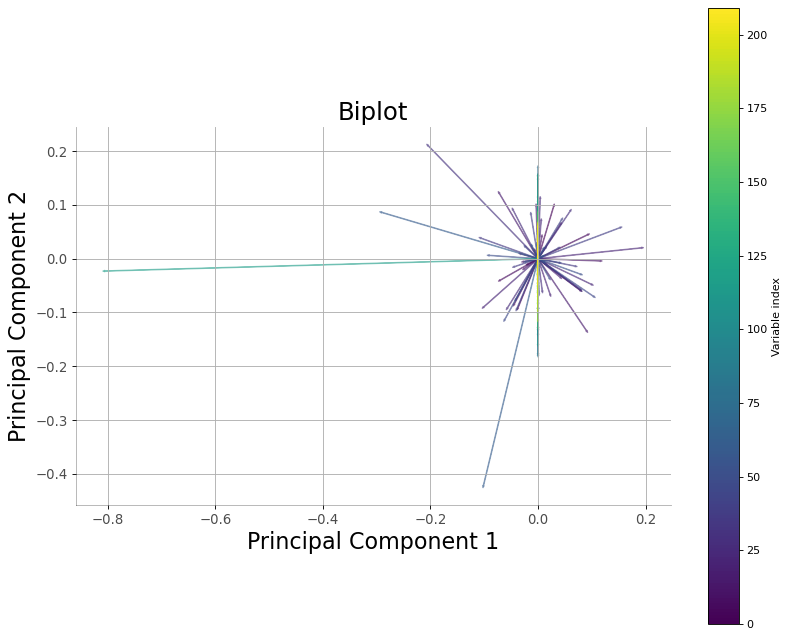

In [57]:
colors = plt.get_cmap("viridis", pca_components.shape[0])
color_vector = colors(np.linspace(0, 1, pca_components.shape[0]))

plt.figure(figsize=(12, 10), dpi=80)

for color, pca_component in zip(color_vector, pca_components):
    plt.arrow(*(0, 0), *pca_component[:2], color=color, alpha=0.5)

plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("Biplot", fontsize=22)

plt.yticks(fontsize=12, alpha=0.7)
plt.xticks(fontsize=12, alpha=0.7)

plt.gca().spines[["top", "right"]].set_alpha(0.0)
plt.gca().spines[["bottom", "left"]].set_alpha(0.3)

plt.colorbar(
    ax=plt.gca(),
    mappable=plt.cm.ScalarMappable(
        cmap=colors, norm=Normalize(vmin=0, vmax=X.shape[1] - 1)
    ),
    label="Variable index",
)
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

### (f)

In [58]:
mse_scores_train = []
r2_scores_train = []
mse_scores_test = []
r2_scores_test = []

for k in range(1, 51):
    model = LinearRegression().fit(Z_train[:, :k], y_train)

    y_pred_pcr_train = model.predict(Z_train[:, :k])
    mse_scores_train.append(mean_squared_error(y_train, y_pred_pcr_train))
    r2_scores_train.append(model.score(Z_train[:, :k], y_train))

    y_pred_pcr_test = model.predict(Z_test[:, :k])
    mse_scores_test.append(mean_squared_error(y_test, y_pred_pcr_test))
    r2_scores_test.append(model.score(Z_test[:, :k], y_test))

In [59]:
print(
    f"Train:\n\tBest k for PCR (MSE): {np.argmin(mse_scores_train) + 1}\n\tBest k for PCR (R2): {np.argmax(r2_scores_train) + 1}"
)
print(
    f"Test:\n\tBest k for PCR (MSE): {np.argmin(mse_scores_test) + 1}\n\tBest k for PCR (R2): {np.argmax(r2_scores_test) + 1}"
)

Train:
	Best k for PCR (MSE): 50
	Best k for PCR (R2): 50
Test:
	Best k for PCR (MSE): 50
	Best k for PCR (R2): 50


In [60]:
model_pcr_k50 = LinearRegression(fit_intercept=False).fit(
    Z_train[:, : np.argmin(mse_scores_train) + 1], y_train
)

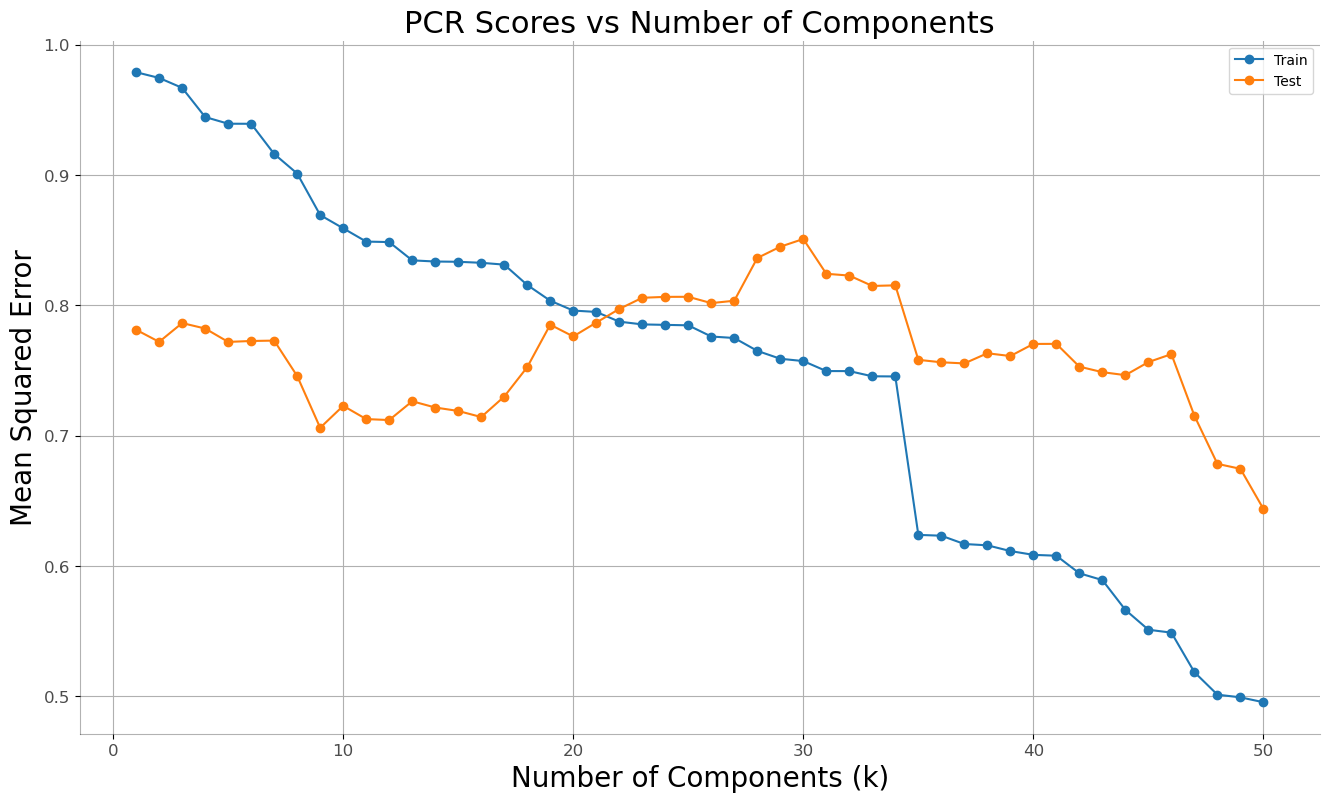

In [61]:
plt.figure(figsize=(16, 9))

plt.plot(range(1, 51), mse_scores_train, marker="o", label="Train")
plt.plot(range(1, 51), mse_scores_test, marker="o", label="Test")

plt.xlabel("Number of Components (k)", fontsize=20)
plt.ylabel("Mean Squared Error", fontsize=20)
plt.title("PCR Scores vs Number of Components", fontsize=22)

plt.yticks(fontsize=12, alpha=0.7)
plt.xticks(fontsize=12, alpha=0.7)

plt.gca().spines[["top", "right"]].set_alpha(0.0)
plt.gca().spines[["bottom", "left"]].set_alpha(0.3)

plt.legend()
plt.grid()
plt.show()

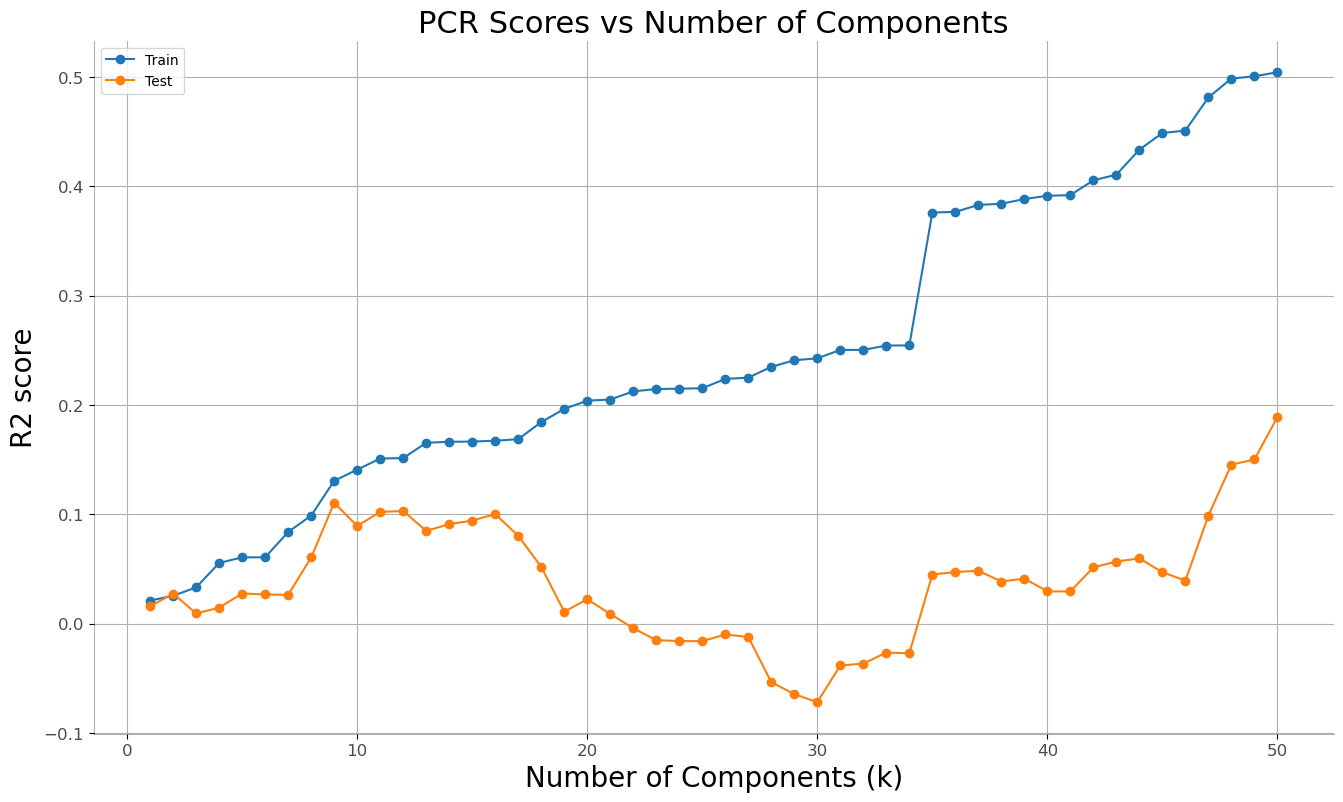

In [62]:
plt.figure(figsize=(16, 9))

plt.plot(range(1, 51), r2_scores_train, marker="o", label="Train")
plt.plot(range(1, 51), r2_scores_test, marker="o", label="Test")

plt.xlabel("Number of Components (k)", fontsize=20)
plt.ylabel("R2 score", fontsize=20)
plt.title("PCR Scores vs Number of Components", fontsize=22)

plt.yticks(fontsize=12, alpha=0.7)
plt.xticks(fontsize=12, alpha=0.7)

plt.gca().spines[["top", "right"]].set_alpha(0.0)
plt.gca().spines[["bottom", "left"]].set_alpha(0.3)

plt.legend()
plt.grid()
plt.show()

## Question 8

In [63]:
models = [
    model_sklearn_linear_regression,
    model_forward_feature_selection,
    model_sklearn_ridge,
    model_sklearn_lasso,
    model_sklearn_elastic_net,
    model_pcr_all,
    model_pcr_k45,
    model_pcr_k50,
]

models_names = [
    "Sklearn OLS",
    "Forward Feature Selection",
    "Ridge",
    "Lasso",
    "Elastic Net",
    "PCR k = p",
    f"PCR k = {num_components_90}",
    f"PCR k = {np.argmin(mse_scores_train) + 1}",
]

In [64]:
mse_scores = {"train": [], "test": []}
r2_scores = {"train": [], "test": []}

for index, model in enumerate(models):
    if index == 1:
        data_train = X_train[:, features_index]
        data_test = X_test[:, features_index]
    elif index == 5:
        data_train = Z_train
        data_test = Z_test
    elif index == 6:
        data_train = Z_train[:, :num_components_90]
        data_test = Z_test[:, :num_components_90]
    elif index == 7:
        data_train = Z_train[:, :np.argmin(mse_scores_train) + 1]
        data_test = Z_test[:, :np.argmin(mse_scores_train) + 1]
    else:
        data_train = X_train
        data_test = X_test

    mse_scores["train"].append(mean_squared_error(y_train, model.predict(data_train)))
    mse_scores["test"].append(mean_squared_error(y_test, model.predict(data_test)))

    r2_scores["train"].append(model.score(data_train, y_train))
    r2_scores["test"].append(model.score(data_test, y_test))


mse_scores_dataframe = pd.DataFrame(mse_scores, index=models_names)
r2_scores_dataframe = pd.DataFrame(r2_scores, index=models_names)

In [65]:
mse_scores_dataframe

,train,test
Sklearn OLS,0.460256,0.621718
Forward Feature Selection,0.408042,0.545214
Ridge,0.392197,0.535712
Lasso,0.471580,0.522562
Elastic Net,0.448599,0.518738
PCR k = p,0.420569,0.670327
PCR k = 45,0.551168,0.756478
PCR k = 50,0.495564,0.643874


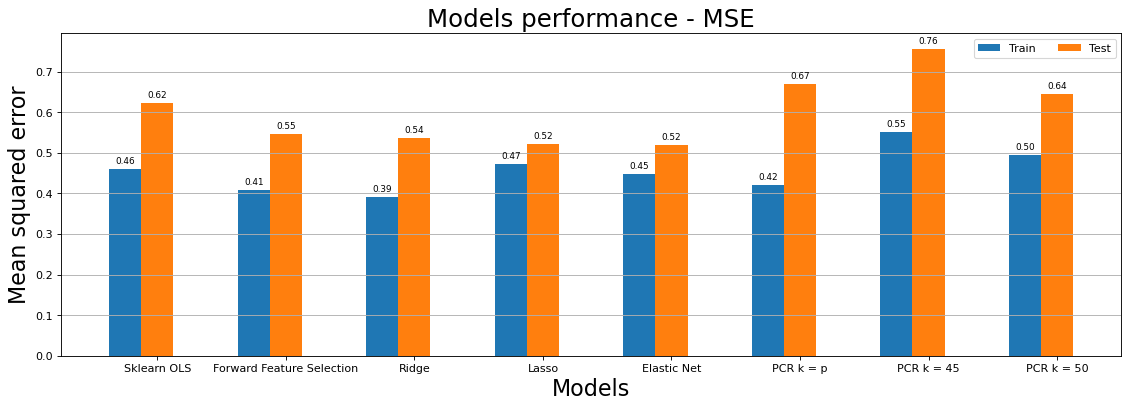

In [66]:
x = np.arange(mse_scores_dataframe.shape[0])
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout="constrained", figsize=(14, 5), dpi=80)

for subset, model in mse_scores_dataframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, model, width, label=subset)
    ax.bar_label(rects, padding=3, fmt="%.2f", fontsize=8)
    multiplier += 1

ax.set_xlabel("Models", fontsize=20)
ax.set_ylabel("Mean squared error", fontsize=20)
ax.set_title("Models performance - MSE", fontsize=22)

ax.set_xticks(x + width, models_names)
ax.legend(["Train", "Test"], ncols=mse_scores_dataframe.shape[1])

ax.grid(axis="y")
plt.show()

1. Regular Ordinary Least Squares (OLS): The OLS model seems to be performing reasonably well, but there is a noticeable increase in MSE from training to testing, indicating a potential risk of overfitting.

2. Model with Forward Feature Selection: Forward feature selection using p-values appears to have improved generalization performance compared to OLS. The decrease in both training and testing MSE is a positive sign.

3. Ridge Regularization: Ridge regularization has resulted in lower MSE values compared to OLS, suggesting improved generalization. The regularization likely helped mitigate overfitting.

4. Lasso Regularization: Lasso regularization has a similar testing MSE as Ridge but a higher training MSE. Lasso tends to perform feature selection by shrinking some coefficients to zero, which might explain the difference.

5. Elastic Net Regularization: Elastic Net, which combines L1 and L2 penalties, shows competitive performance. It balances feature selection and regularization, resulting in a relatively low testing MSE.

6. PCR (Principal Component Regression) $k = p$: PCR with the same number of components as original features performs well on training but shows an increase in testing MSE, indicating potential overfitting.

7. PCR $k = 45$ (cumulative explained variance 90%): PCR with $45$ components and $90\%$ explained variance exhibits higher MSE on both training and testing, suggesting that dimensionality reduction might have led to loss of information.

8. PCR $k = 50$: PCR model with $50$ features exhibits reasonable performance on both training and testing sets.

Analysis:
- Ridge and Elastic Net regularization appear to provide good balance, reducing overfitting and achieving low testing MSE.
- Forward feature selection also shows promise in improving model performance.

In [67]:
r2_scores_dataframe

,train,test
Sklearn OLS,0.539744,0.216847
Forward Feature Selection,0.591958,0.313216
Ridge,0.607803,0.325185
Lasso,0.528420,0.341750
Elastic Net,0.551401,0.346566
PCR k = p,0.579431,0.155616
PCR k = 45,0.448832,0.047095
PCR k = 50,0.504436,0.188938


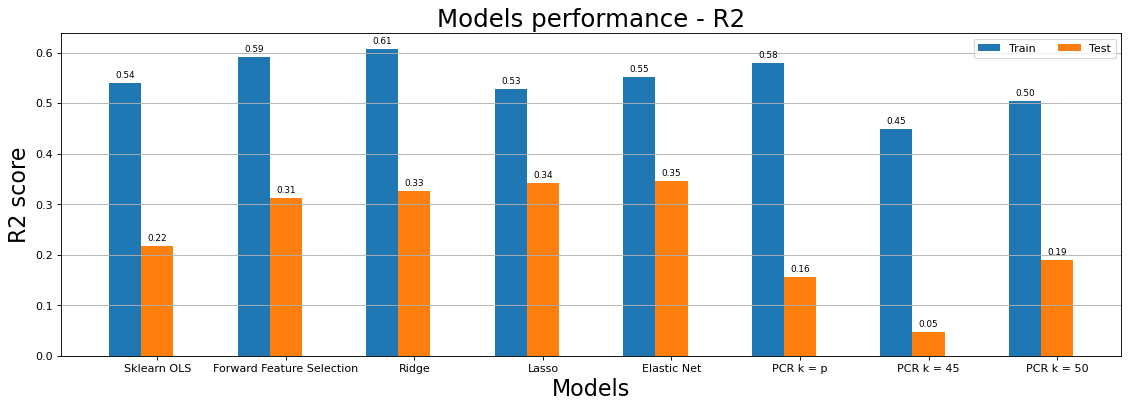

In [68]:
x = np.arange(r2_scores_dataframe.shape[0])
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout="constrained", figsize=(14, 5), dpi=80)

for subset, model in r2_scores_dataframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, model, width, label=subset)
    ax.bar_label(rects, padding=3, fmt="%.2f", fontsize=8)
    multiplier += 1

ax.set_xlabel("Models", fontsize=20)
ax.set_ylabel("R2 score", fontsize=20)
ax.set_title("Models performance - R2", fontsize=22)

ax.set_xticks(x + width, models_names)
ax.legend(["Train", "Test"], ncols=r2_scores_dataframe.shape[1])

ax.grid(axis="y")
plt.show()

1. Regular Ordinary Least Squares (OLS):  The $R^2$ score on the testing set is relatively low, suggesting that the OLS model might not be capturing the underlying patterns well.

2. Model with Forward Feature Selection: The $R^2$ scores for both training and testing sets are higher than those of OLS, indicating that forward feature selection has improved the model's ability to explain the variance in the target variable.

3. Ridge Regularization: The Ridge model shows a relatively higher $R^2$ score on both training and testing sets compared to OLS, suggesting better performance in explaining the variance.

4. Lasso Regularization: Lasso demonstrates a higher $R^2$ score on the testing set compared to the training set. This may suggest overfitting, but the testing $R^2$ is relatively high.

5. Elastic Net Regularization: Similar to Lasso, Elastic Net exhibits a higher R2R2 on the testing set, indicating good performance in explaining the variance.

6. PCR (Principal Component Regression) $k = p$: PCR with the same number of features as the original dataset shows a higher $R^2$ on the training set but a lower $R2$ on the testing set, suggesting potential overfitting.

7. PCR $k = 45$ (cumulative explained variance 90%): PCR with $45$ features has a low $R^2$ on the testing set, indicating poor model fit and lack of explanatory power.

8. PCR $k = 50$:  PCR with $50$ features shows moderate performance on both training and testing sets.

Analysis:
- Ridge and Elastic Net models consistently show higher $R^2$ scores, suggesting better explanatory power compared to OLS.
- Lasso and Elastic Net have higher testing $R^2$ than training $R^2$, indicating potential overfitting but with good predictive performance.
- Forward feature selection has improved $R^2$ scores, demonstrating its effectiveness in enhancing model interpretability.

Ridge and Elastic Net regularization consistently outperform other models, demonstrating notable strengths with low Mean Squared Error (MSE) values and relatively high $R^2$ scores. These outcomes signify their effectiveness in explaining variance and predicting outcomes. Despite indications of potential overfitting, as reflected in higher testing $R^2$ compared to training $R^2$, Lasso and Elastic Net exhibit competitive predictive accuracy. Forward feature selection notably enhances $R^2$ scores, underscoring its efficacy in bolstering model interpretability. Ordinary Least Squares (OLS) and Principal Component Regression (PCR) models exhibit varied success, with PCR's performance notably contingent on feature selection. Given the positive impact of forward feature selection on the traditional OLS model, considering its application on PCR components could be a promising avenue for further improvement. Yet another approach would be K-fold cross validation. In summary, Ridge and Elastic Net regularization models emerge as robust choices, skillfully balancing model complexity, interpretability, and predictive accuracy in this comprehensive analysis.